In [1]:
from skimage.io import imshow
from scipy.misc import imread
import matplotlib.pyplot as plt
import numpy as np
from scipy.misc import imresize

In [2]:
img = imread('00_input/train/images/00054.jpg', mode="RGB")

In [3]:
print(img.shape)

(147, 147, 3)


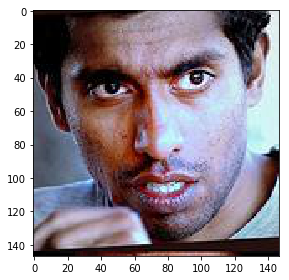

In [4]:
imshow(img)
plt.show()

In [5]:
import pandas as pd

In [6]:
data = pd.read_csv('00_input/train/gt.csv', index_col='filename')
print(data.head())

           x1   y1   x2  y2   x3  y3   x4  y4  x5   y5 ...   x10  y10  x11  \
filename                                               ...                   
00000.jpg  51   51  127  60  169  65  203  52  68   77 ...   193   84  156   
00001.jpg  21   20   36  18   57  19   80  25  23   27 ...    78   33   43   
00002.jpg  23  116   39  83   47  57   56  19  36  115 ...    62   31   91   
00003.jpg  29   18   63  25   84  32  105  34  38   31 ...    95   45   72   
00004.jpg  31   53   76  44  107  38  136  33  40   67 ...   129   49  111   

           y11  x12  y12  x13  y13  x14  y14  
filename                                      
00000.jpg  144   92  174  140  180  168  179  
00001.jpg   46   31   61   45   66   60   65  
00002.jpg   86  106  122  115  100  121   81  
00003.jpg   71   46   83   63   87   75   89  
00004.jpg  105   72  137  106  132  126  121  

[5 rows x 28 columns]


In [7]:
dots = np.array(data.loc['00054.jpg'])
x_dots = dots[::2]
y_dots = dots[1::2]

In [8]:
for i in range(0, len(x_dots)):
    img[y_dots[i]][x_dots[i]] = (255, 0, 0)

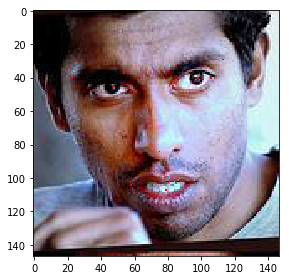

In [9]:
imshow(img)
plt.show()

In [10]:
img_resized = imresize(img, size=(64, 64), interp='cubic')
x_dots_resized = x_dots / img.shape[1] * 64
y_dots_resized = y_dots / img.shape[0] * 64

In [11]:
print(x_dots_resized, y_dots_resized)
dots_resized = []
for i in range(len(x_dots_resized)):
    dots_resized.append(x_dots_resized[i])
    dots_resized.append(y_dots_resized[i])
dots_resized = np.array(dots_resized)
print(dots_resized)

[ 10.01360544  23.51020408  34.82993197  49.19727891  14.80272109
  20.46258503  25.25170068  36.13605442  42.66666667  46.14965986
  32.65306122  25.25170068  34.39455782  42.66666667] [ 17.41496599  16.10884354  15.67346939  12.62585034  20.89795918
  19.59183673  20.89795918  19.59183673  17.41496599  17.41496599
  36.57142857  45.27891156  46.58503401  44.40816327]
[ 10.01360544  17.41496599  23.51020408  16.10884354  34.82993197
  15.67346939  49.19727891  12.62585034  14.80272109  20.89795918
  20.46258503  19.59183673  25.25170068  20.89795918  36.13605442
  19.59183673  42.66666667  17.41496599  46.14965986  17.41496599
  32.65306122  36.57142857  25.25170068  45.27891156  34.39455782
  46.58503401  42.66666667  44.40816327]


In [12]:
for i in range(0, len(x_dots)):
    img_resized[int(y_dots_resized[i])][int(x_dots_resized[i])] = (255, 0, 0)

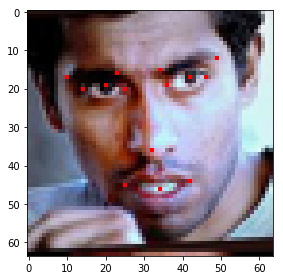

In [13]:
imshow(img_resized)
plt.show()

In [14]:
def get_resized(path, filename):
    img = imread(path + filename, mode='RGB')
    data = pd.read_csv('00_input/train/gt.csv', index_col='filename')
    dots = np.array(data.loc[filename])
    x_dots = dots[::2]
    y_dots = dots[1::2]
    img_resized = imresize(img, size=(64, 64), interp='cubic')
    x_dots_resized = x_dots / img.shape[1] * 64
    y_dots_resized = y_dots / img.shape[0] * 64
    dots_resized = []
    for i in range(len(x_dots_resized)):
        dots_resized.append(x_dots_resized[i])
        dots_resized.append(y_dots_resized[i])
    dots_resized = np.array(dots_resized)
    return img_resized, dots_resized

In [15]:
def load_images(path):
    X = []
    y = []
    data = pd.read_csv('00_input/train/gt.csv', index_col='filename')
    for filename in data.index.values[:10000]:
        img_resized, dots_resized = get_resized(path, filename)
        X.append(img_resized)
        y.append(dots_resized)
    X = np.array(X)
    y = np.array(y)
    return X, y

In [16]:
path = '00_input/train/images/'

In [17]:
X, y = load_images(path)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4800, 64, 64, 3) (1200, 64, 64, 3) (4800, 28) (1200, 28)


In [21]:
print(X_train[0][0][0], X_train[1][0][0])
print(X_test[0][0][0], X_test[1][0][0])
print(y_train[0], y_train[1])
print(y_test[0], y_test[1])

[81 56 36] [78 51 34]
[187 171 158] [1 1 1]
[ 12.54901961  16.0627451   24.09411765  12.04705882  36.89411765
  11.79607843  49.94509804  14.30588235  15.56078431  20.32941176
  20.83137255  19.0745098   25.85098039  19.0745098   37.64705882
  18.82352941  43.41960784  18.57254902  49.44313725  19.0745098
  32.62745098  29.11372549  21.58431373  44.9254902   32.37647059
  43.41960784  40.90980392  44.6745098 ] [  9.14285714  13.36263736  26.02197802  14.76923077  38.68131868
  12.65934066  52.04395604  12.65934066  12.65934066  21.8021978
  18.98901099  20.3956044   21.8021978   20.3956044   42.1978022
  20.3956044   47.12087912  20.3956044   49.93406593  20.3956044
  31.64835165  33.75824176  23.20879121  45.01098901  30.94505495
  45.01098901  38.68131868  45.01098901]
[ 16.59259259  13.43209877  27.65432099  11.85185185  41.87654321
  14.22222222  52.9382716   16.59259259  18.96296296  18.17283951
  22.12345679  18.17283951  26.07407407  18.96296296  41.08641975
  21.33333333  45.03

In [22]:
from keras.models import Sequential
from keras.layers import Dropout, Dense, Activation, Conv2D, MaxPooling2D, Flatten

Using TensorFlow backend.


In [23]:
# model = Sequential()

# model.add(Convolution2D(32, kernel_size=(3, 3), input_shape=(64, 64, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.1))

# # model.add(Convolution2D(64, kernel_size=(2, 2)))
# # model.add(Activation('relu'))
# # model.add(MaxPooling2D(pool_size=(2, 2)))
# # model.add(Dropout(0.2))

# # model.add(Convolution2D(128, kernel_size=(2, 2)))
# # model.add(Activation('relu'))
# # model.add(MaxPooling2D(pool_size=(2, 2)))
# # model.add(Dropout(0.3))

# model.add(Flatten())

# # model.add(Dense(500))
# # model.add(Activation('relu'))
# # model.add(Dropout(0.5))

# model.add(Dense(100))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))

# model.add(Dense(28))
# # model.add(Activation('sigmoid'))

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(64, 64, 3), data_format='channels_last'))
# model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(2, 2)))
# model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, kernel_size=(2, 2)))
# model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(500))
model.add(Dropout(0.5))
model.add(Dense(500))
model.add(Dropout(0.5))
# model.add(Activation('sigmoid'))
model.add(Dense(28))
# model.add(Activation('sigmoid'))

In [24]:
# model = Sequential()
# model.add(Convolution2D(32, kernel_size=(2, 2), input_shape=(64, 64, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Flatten())

# model.add(Dense(100))
# model.add(Activation('sigmoid'))
# model.add(Dense(28))
# model.add(Activation('sigmoid'))

In [25]:
# start = 0.03
# stop = 0.001
# nb_epoch = 1000
# learning_rate = np.linspace(start, stop, nb_epoch)

In [26]:
# from keras.optimizers import Adam
# from keras.callbacks import EarlyStopping, LearningRateScheduler

In [27]:
# rmsprop = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=1e-6)
model.compile(loss='mse', optimizer='Adam')
# change_lr = LearningRateScheduler(lambda epoch: float(learning_rate[epoch]))
# early_stop = EarlyStopping(patience=100)

In [ ]:
model.fit(X_train, y_train, batch_size=32, epochs=60, validation_data=(X_test, y_test))

Train on 4800 samples, validate on 1200 samples
Epoch 1/60

 640/4800 [===>..........................] - ETA: 56s - loss: 2448.8689

In [ ]:
# model.save_weights('my_cnn_model_weights.h5', overwrite=True)
# np.savetxt('my_cnn_model_loss.csv', hist.history['loss'])
# np.savetxt('my_cnn_model_val_loss.csv', hist.history['val_loss'])

In [ ]:
# model.fit(X_train, y_train, epochs=400, batch_size=32)

In [ ]:
proba = model.predict(X_test)

In [ ]:
print(proba[0])

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
print(mean_squared_error(y_true=y_test, y_pred=y_pred) * 64)

In [ ]:
print(y_pred[100], y_pred[115])

In [140]:
x_dots_resized = y_pred[32][::2]
y_dots_resized = y_pred[32][1::2]
img_resized = X_test[32]

In [141]:
print(x_dots_resized, y_dots_resized)

[ 11.60152531  23.107584    34.37971115  47.61690521  13.77169323
  19.40035439  22.0557003   35.79410934  41.34261322  44.67892075
  28.93070984  21.14621353  29.63768387  36.71312332] [ 12.84706306  12.73144627  13.56206799  12.71113777  18.05190849
  18.14399719  18.14142036  19.23368263  18.53712845  19.4376564
  31.07516479  40.10353088  41.79464722  40.3083725 ]


In [142]:
for i in range(0, len(y_dots_resized)):
    img_resized[min(63, int(y_dots_resized[i]))][min(63,int(x_dots_resized[i]))] = (255, 0, 0)

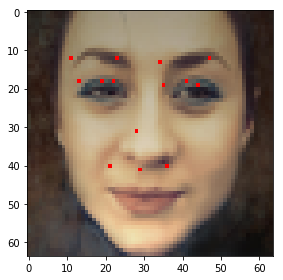

In [143]:
imshow(img_resized)
plt.show()